# Loan Prediction Project

In [21]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load and Read Dataset

In [22]:
LD = pd.read_csv(r'''C:\Users\USER\OneDrive\Desktop\Naresh\DS and ML Projects\Data\Loan_data\Loan_data.csv''')
LD.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### EDA

In [23]:
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
LD.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
LD.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [26]:
#Checking for null values if any
LD.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#Filling null values
LD["Gender"].fillna(LD["Gender"].mode()[0], inplace = True)
LD["Married"].fillna(LD["Married"].mode()[0], inplace = True)
LD["Dependents"].fillna(LD["Dependents"].mode()[0], inplace = True)
LD["Self_Employed"].fillna(LD["Self_Employed"].mode()[0], inplace = True)

LD["LoanAmount"].fillna(LD["LoanAmount"].mean(), inplace = True)
LD["Loan_Amount_Term"].fillna(LD["Loan_Amount_Term"].mean(), inplace = True)
LD["Credit_History"].fillna(LD["Credit_History"].mode()[0], inplace = True)

LD.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#Checking for duplicate values if any
LD[LD.duplicated()].sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area          0
Loan_Status            0
dtype: object

##### Univariate vizualization

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

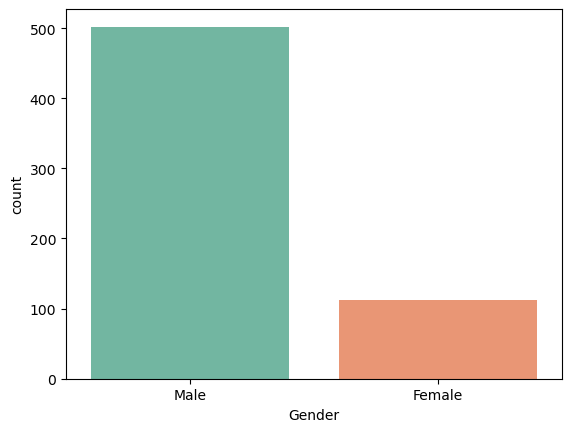

In [29]:
#Gender count
print(LD["Gender"].value_counts())
sns.countplot(x = "Gender", data = LD, palette = "Set2")


Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

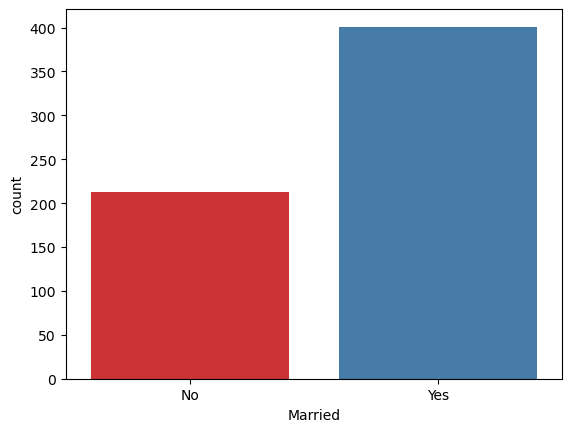

In [30]:
print(LD["Married"].value_counts())
sns.countplot(x = "Married", data = LD, palette = "Set1")

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

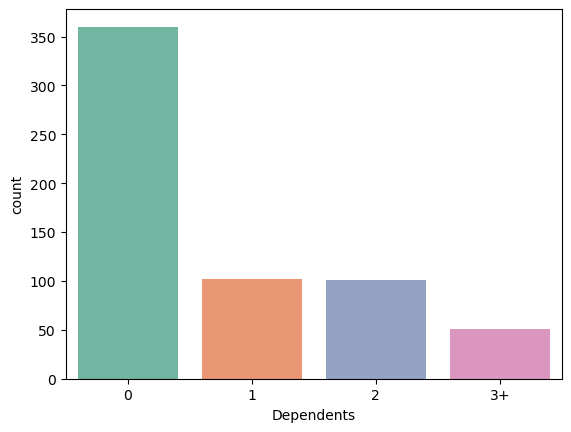

In [31]:
print(LD["Dependents"].value_counts())
sns.countplot(x = "Dependents", data = LD, palette = "Set2")

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

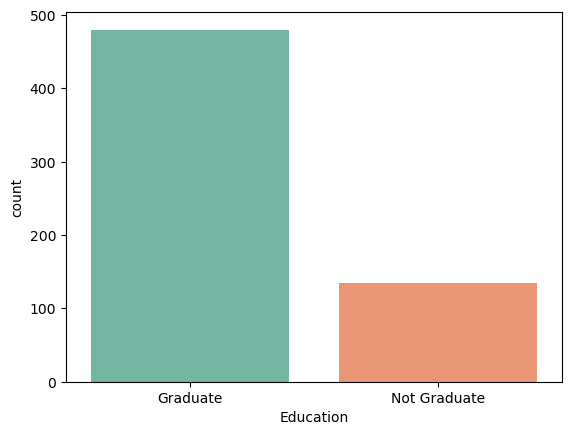

In [32]:
print(LD["Education"].value_counts())
sns.countplot(x = "Education", data = LD, palette = "Set2")

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

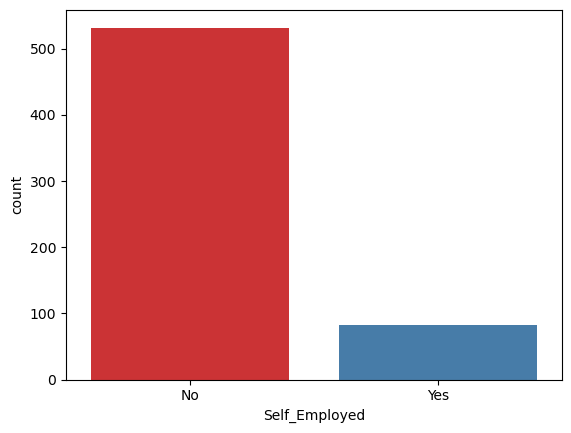

In [33]:
print(LD["Self_Employed"].value_counts())
sns.countplot(x = "Self_Employed", data = LD, palette = "Set1")

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

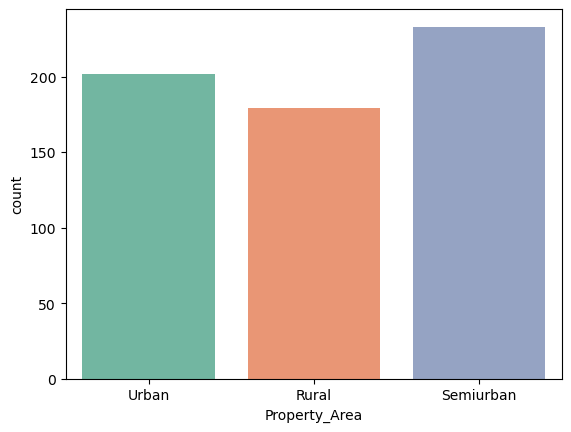

In [34]:
print(LD["Property_Area"].value_counts())
sns.countplot(x = "Property_Area", data = LD, palette = "Set2")

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

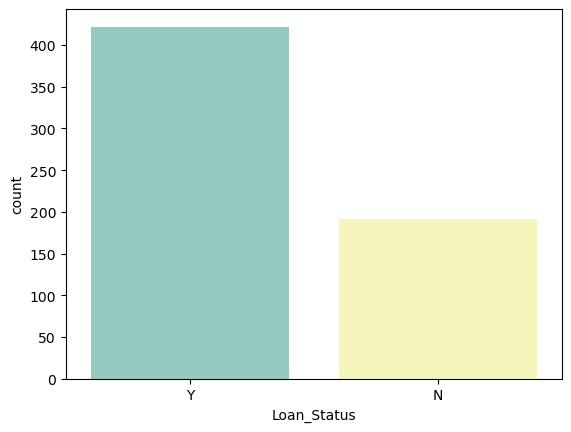

In [35]:
print(LD["Loan_Status"].value_counts())
sns.countplot(x = "Loan_Status", data = LD, palette = "Set3")

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

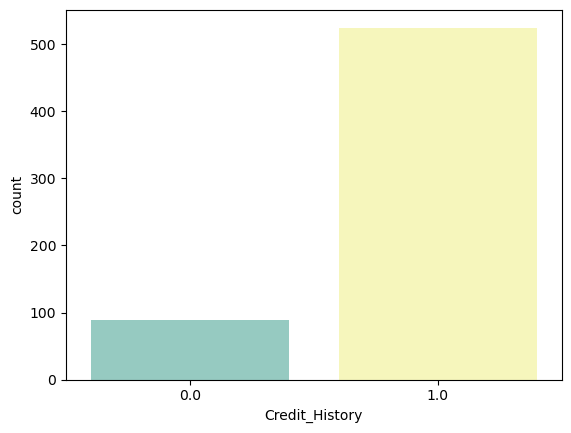

In [36]:
print(LD["Credit_History"].value_counts())
sns.countplot(x = "Credit_History", data = LD, palette = "Set3")

In [37]:
obj_col = LD.select_dtypes(include = ["object"]).columns
obj_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
#Preprocess the object data to numerical value
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder() for col in obj_col}
label_encoders

{'Loan_ID': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Education': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Property_Area': LabelEncoder(),
 'Loan_Status': LabelEncoder()}

In [39]:
#Fit_Transform Object data to numeric values
for col in obj_col:
    LD[col] = label_encoders[col].fit_transform(LD[col])
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [40]:
#Splitting feature and Target data

X = LD.drop(["Loan_Status"], axis = 1)
y = LD["Loan_Status"]
LD

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [41]:
num_col = LD.drop(["Loan_Status"], axis = 1).select_dtypes(include = ["number"]).columns
num_col.size

12

In [42]:
#Scaling the numerical data to fit into a same scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

LD[num_col] = scaler.fit_transform(LD[num_col])
LD

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.411733,1.223298,1
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.411733,-1.318513,0
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.411733,1.223298,1
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.411733,1.223298,1
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.411733,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.279851,0.411733,-1.318513,1
610,1.712307,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.518655,0.411733,-1.318513,1
611,1.717948,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.279851,0.411733,1.223298,1
612,1.723590,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.279851,0.411733,1.223298,1


In [43]:
#preparing for test_train_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


In [44]:
y_train.shape, y_test.shape
y_train.value_counts(), y_test.value_counts()

(Loan_Status
 1    332
 0    159
 Name: count, dtype: int64,
 Loan_Status
 1    90
 0    33
 Name: count, dtype: int64)

### Random_Forest_Classifier Model

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)

RF_y_pred = RF_clf.predict(X_test)

print("Accuracy of Random_Forest_Classifier is:", round(accuracy_score(RF_y_pred, y_test), 3))
print("\nClassification Report of Random_Forest_Classifier is: \n", classification_report(RF_y_pred, y_test))
print("\nConfusion matric of Random_Forest_Classifier is: \n", confusion_matrix(RF_y_pred, y_test))

Accuracy of Random_Forest_Classifier is: 0.821

Classification Report of Random_Forest_Classifier is: 
               precision    recall  f1-score   support

           0       0.48      0.76      0.59        21
           1       0.94      0.83      0.89       102

    accuracy                           0.82       123
   macro avg       0.71      0.80      0.74       123
weighted avg       0.87      0.82      0.84       123


Confusion matric of Random_Forest_Classifier is: 
 [[16  5]
 [17 85]]


### Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

NB_y_pred = NB_clf.predict(X_test)

print("Accuracy of Naive_Bayes_Classifier is:", round(accuracy_score(NB_y_pred, y_test), 3))
print("\nClassification Report of Naive_Bayes_Classifier is: \n", classification_report(NB_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(NB_y_pred, y_test))

Accuracy of Naive_Bayes_Classifier is: 0.829

Classification Report of Naive_Bayes_Classifier is: 
               precision    recall  f1-score   support

           0       0.45      0.83      0.59        18
           1       0.97      0.83      0.89       105

    accuracy                           0.83       123
   macro avg       0.71      0.83      0.74       123
weighted avg       0.89      0.83      0.85       123


Confusion matric of Naive_Bayes_Classifier is: 
 [[15  3]
 [18 87]]


### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DT_y_pred = DT_clf.predict(X_test)

print("Accuracy of Decision_Tree_Classifier is:", round(accuracy_score(DT_y_pred, y_test), 3))
print("\nClassification Report of Decision_Tree_Classifier is: \n", classification_report(DT_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(DT_y_pred, y_test))

Accuracy of Decision_Tree_Classifier is: 0.634

Classification Report of Decision_Tree_Classifier is: 
               precision    recall  f1-score   support

           0       0.33      0.32      0.33        34
           1       0.74      0.75      0.75        89

    accuracy                           0.63       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.63      0.63      0.63       123


Confusion matric of Naive_Bayes_Classifier is: 
 [[11 23]
 [22 67]]


### KNearestNeighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)

KNN_y_pred = KNN_clf.predict(X_test)

print("Accuracy of K_Neighbors_Classifier is:", round(accuracy_score(KNN_y_pred, y_test), 3))
print("\nClassification Report of K_Neighbors_Classifier is: \n", classification_report(KNN_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(KNN_y_pred, y_test))

Accuracy of K_Neighbors_Classifier is: 0.626

Classification Report of K_Neighbors_Classifier is: 
               precision    recall  f1-score   support

           0       0.12      0.19      0.15        21
           1       0.81      0.72      0.76       102

    accuracy                           0.63       123
   macro avg       0.47      0.45      0.45       123
weighted avg       0.69      0.63      0.66       123


Confusion matric of Naive_Bayes_Classifier is: 
 [[ 4 17]
 [29 73]]


### Support Vector Machine

In [49]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(X_train, y_train)

SVM_y_pred = SVM_clf.predict(X_test)

print("Accuracy of SVM_Classifier is:", round(accuracy_score(SVM_y_pred, y_test), 3))
print("\nClassification Report of SVM_Classifier is: \n", classification_report(SVM_y_pred, y_test, zero_division = 1))
print("\nConfusion matric of SVM_Classifier is: \n", confusion_matrix(SVM_y_pred, y_test))

Accuracy of SVM_Classifier is: 0.732

Classification Report of SVM_Classifier is: 
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.73      0.85       123

    accuracy                           0.73       123
   macro avg       0.50      0.87      0.42       123
weighted avg       1.00      0.73      0.85       123


Confusion matric of SVM_Classifier is: 
 [[ 0  0]
 [33 90]]


### Stochastic Gradient Descent

In [50]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier()
SGD_clf.fit(X_train, y_train)

SGD_y_pred = SGD_clf.predict(X_test)

print("Accuracy of Stochastic_Gradient_Descent_Classifier is:", round(accuracy_score(SGD_y_pred, y_test), 3))
print("\nClassification Report of Stochastic_Gradient_Descent_Classifier is: \n", classification_report(SGD_y_pred, y_test))
print("\nConfusion matric of Stochastic_Gradient_Descent_Classifier is: \n", confusion_matrix(SGD_y_pred, y_test))

Accuracy of Stochastic_Gradient_Descent_Classifier is: 0.423

Classification Report of Stochastic_Gradient_Descent_Classifier is: 
               precision    recall  f1-score   support

           0       0.48      0.23      0.31        70
           1       0.40      0.68      0.50        53

    accuracy                           0.42       123
   macro avg       0.44      0.45      0.41       123
weighted avg       0.45      0.42      0.39       123


Confusion matric of Stochastic_Gradient_Descent_Classifier is: 
 [[16 54]
 [17 36]]


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

LGR_clf = LogisticRegression(max_iter = 1000)
LGR_clf.fit(X_train, y_train)

LGR_y_pred = LGR_clf.predict(X_test)

print("Accuracy of Logistic Regression_Classifier is:", round(accuracy_score(LGR_y_pred, y_test), 3))
print("\nClassification Report of Logistic Regression_Classifier is: \n", classification_report(LGR_y_pred, y_test))
print("\nConfusion matric of Logistic Regression_Classifier is: \n", confusion_matrix(LGR_y_pred, y_test))

Accuracy of Logistic Regression_Classifier is: 0.837

Classification Report of Logistic Regression_Classifier is: 
               precision    recall  f1-score   support

           0       0.45      0.88      0.60        17
           1       0.98      0.83      0.90       106

    accuracy                           0.84       123
   macro avg       0.72      0.86      0.75       123
weighted avg       0.91      0.84      0.86       123


Confusion matric of Logistic Regression_Classifier is: 
 [[15  2]
 [18 88]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print("Accuracy of Random_Forest_Classifier is:", round(accuracy_score(RF_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Naive_Bayes_Classifier is:", round(accuracy_score(NB_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Decision_Tree_Classifier is:", round(accuracy_score(DT_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of K_Neighbors_Classifier is:", round(accuracy_score(KNN_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of SVM_Classifier is:", round(accuracy_score(SVM_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Stochastic_Gradient_Descent_Classifier is:", round(accuracy_score(SGD_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Logistic Regression_Classifier is:", round(accuracy_score(LGR_y_pred, y_test), 3))
print("-"*100)

Accuracy of Random_Forest_Classifier is: 0.821
----------------------------------------------------------------------------------------------------
Accuracy of Naive_Bayes_Classifier is: 0.829
----------------------------------------------------------------------------------------------------
Accuracy of Decision_Tree_Classifier is: 0.634
----------------------------------------------------------------------------------------------------
Accuracy of K_Neighbors_Classifier is: 0.626
----------------------------------------------------------------------------------------------------
Accuracy of SVM_Classifier is: 0.732
----------------------------------------------------------------------------------------------------
Accuracy of Stochastic_Gradient_Descent_Classifier is: 0.423
----------------------------------------------------------------------------------------------------
Accuracy of Logistic Regression_Classifier is: 0.837
-----------------------------------------------------------